In [21]:
from pyBadlands.model import Model as badlandsModel
import numpy as np
from scipy.spatial import cKDTree
from numpy import genfromtxt
import matplotlib.pyplot as plt
from __future__ import print_function, division
import math, csv

In [22]:
def interpolateArray(coords=None, z=None, dz=None):
    """
    Interpolate the irregular spaced dataset from badlands on a regular grid.
    """
    x, y = np.hsplit(coords, 2)
    dx = (x[1]-x[0])[0]

    nx = int(((x.max() - x.min())/dx+1) - 2)
    ny = int(((y.max() - y.min())/dx+1) - 2)
    xi = np.linspace(x.min(), x.max(), nx)
    yi = np.linspace(y.min(), y.max(), ny)

    xi, yi = np.meshgrid(xi, yi)
    xyi = np.dstack([xi.flatten(), yi.flatten()])[0]
    XY = np.column_stack((x,y))

    tree = cKDTree(XY)
    distances, indices = tree.query(xyi, k=3)
    if len(z[indices].shape) == 3:
        z_vals = z[indices][:,:,0]
        dz_vals = dz[indices][:,:,0]
    else:
        z_vals = z[indices]
        dz_vals = dz[indices]

    zi = np.average(z_vals,weights=(1./distances), axis=1)
    dzi = np.average(dz_vals,weights=(1./distances), axis=1)
    onIDs = np.where(distances[:,0] == 0)[0]
    if len(onIDs) > 0:
        zi[onIDs] = z[indices[onIDs,0]]
        dzi[onIDs] = dz[indices[onIDs,0]]
    zreg = np.reshape(zi,(ny,nx))
    dzreg = np.reshape(dzi,(ny,nx))
    
    return zreg,dzreg


In [23]:
# Initialise model
model = badlandsModel()
# Define the XmL input file
model.load_xml('Output','AUSP1306.xml', muted = False)

ValueError: ('DEM file is missing or the given path is incorrect.', 'Examples/australia/AUSP1306/Paleotopo/Paleotopo_P100_50km_prec2.csv')

## Running pyBadlands

We can run the model for a given period. The end time in the **XmL** input file is set to _500k years_ but you might want to run the model for a coupled of iterations and check the output before running the model for the entire simulation time. This is done by putting the time in the **run_to_time** function. 

Here we go for the full time directly... it should take less than 10 minutes on a single processor if you keep the initial setting unchanged. By changing the **resfactor** in the _XmL input file_ you will change both the resolution and the computation time.

In [24]:
# Run model for 500k years. This takes a few minutes.
model.run_to_time(-1.49E+08, muted = False)
# model.run_to_time(0)

elev, erodep = interpolateArray(model.FVmesh.node_coords[:, :2], model.elevation, model.cumdiff)


AssertionError: DEM file has not been loaded. Configure one in your XML file or call the build_mesh function.

In [25]:
a = np.loadtxt("data/elev_master_50km.csv")
b = genfromtxt("data/erdp_master_50km.csv", delimiter=",")
c = np.loadtxt("AUSP1306/Paleotopo/Paleotopo_P100_50km_prec2.csv")

a = a[:,2].reshape(a.shape[0],1)
b = b[:,2].reshape(b.shape[0],1)
c = c[:,2].reshape(c.shape[0],1)

In [26]:
print (elev.shape)
print (erodep.shape)
print (a.shape)
print (b.shape)
print (c.shape)

(129, 141)
(129, 141)
(18189, 1)
(18189, 1)
(18189, 1)


In [27]:
indx = 6431
x = indx/elev.shape[1]
print (x)
x = int(math.ceil(indx/elev.shape[1])-1)
y = int((indx - x*elev.shape[1])-1)
print( int(x), int(y))

45.609929078
45 85


In [28]:
a = a.reshape((elev.shape[0], elev.shape[1]))
b = b.reshape((elev.shape[0], elev.shape[1]))
c = c.reshape((elev.shape[0], elev.shape[1]))
print (a.shape)
print (b.shape)
print (c.shape)

np.savetxt("data/final_elev.txt", a)
np.savetxt("data/final_erdp.txt", b)
np.savetxt("data/initial_elev.txt",c)

print (b.shape, b[x,y])

(129, 141)
(129, 141)
(129, 141)
(129, 141) 10.4141


In [41]:
final = np.loadtxt('data/final_elev_filtered_ocean.txt')
result = np.where((final>=500)&(final<=1500))

# print ('result ', result[0], 'final',final[0])
print ('Min of result',np.amin(result))

t = list(zip(result[0], result[1]))
t = np.asarray(t)
print(t)
print('t.shape ', t.shape[0])
print ('Min of T',np.amin(t))
print('\n final',final[t[0][1],t[0][0]], 't',t[0][1],t[0][0] )

np.savetxt('coord_final_elev_mt.txt',t)
val = np.zeros(t.shape[0])
print('val.shape', val.shape)


for i in range(t.shape[0]):
    val[i] = final[t[i][0],t[i][1]]

print(val.shape)
print ('Min of Val',np.amin(val), 'Max', np.amax(val))
np.savetxt('elev_pts_updated_mt.txt', val)

Min of result 18
[[ 18  88]
 [ 20  88]
 [ 20  89]
 [ 21  87]
 [ 21  88]
 [ 21  89]
 [ 22  87]
 [ 30  89]
 [ 30  90]
 [ 31  86]
 [ 31  89]
 [ 31  90]
 [ 31  91]
 [ 31  92]
 [ 31  93]
 [ 31  94]
 [ 31  95]
 [ 32  89]
 [ 32  90]
 [ 32  91]
 [ 32  92]
 [ 32  94]
 [ 32  95]
 [ 33  91]
 [ 33  92]
 [ 33  94]
 [ 33  95]
 [ 34  92]
 [ 34  93]
 [ 34  94]
 [ 34  95]
 [ 34  96]
 [ 35  94]
 [ 35  95]
 [ 35  96]
 [ 35  97]
 [ 36  95]
 [ 36  96]
 [ 36  97]
 [ 36  98]
 [ 37  95]
 [ 37  96]
 [ 37  97]
 [ 38  96]
 [ 38  97]
 [ 38  98]
 [ 39  96]
 [ 39  97]
 [ 39  98]
 [ 40  95]
 [ 40  96]
 [ 40  97]
 [ 40  98]
 [ 40  99]
 [ 41  77]
 [ 42  99]
 [ 42 101]
 [ 43 100]
 [ 43 101]
 [ 43 102]
 [ 44  97]
 [ 44 101]
 [ 44 102]
 [ 45 100]
 [ 45 101]
 [ 45 102]
 [ 45 103]
 [ 45 104]
 [ 46  99]
 [ 46 100]
 [ 46 101]
 [ 46 102]
 [ 47  38]
 [ 47  77]
 [ 47 101]
 [ 47 102]
 [ 47 103]
 [ 48  78]
 [ 48 102]
 [ 48 103]
 [ 49 102]
 [ 49 103]
 [ 49 104]
 [ 50 104]
 [ 51  38]
 [ 51  39]
 [ 51  45]
 [ 51  46]
 [ 51 103]
 [ 5

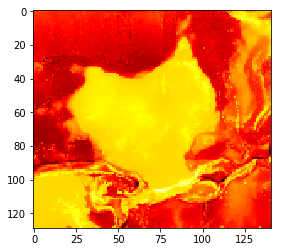

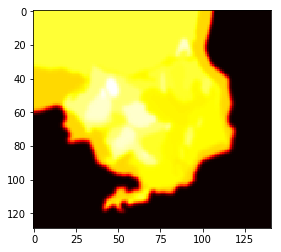

In [31]:
plt.imshow(a, cmap='hot', interpolation='nearest')
plt.show()
plt.close()
plt.imshow(c, cmap='hot', interpolation='nearest')
plt.show()
plt.close()

In [32]:
# print(b[0,:])
a = np.nan_to_num(a)
b = np.nan_to_num(b)
# print(b[0,:])

In [33]:
d = b.nonzero()
e = a.nonzero()
# print(d,e)
coord = zip(d[0],d[1])
print(coord[0])
#coord = np.array(coord)
# coord.shape
# print(coord)
# print(len(coord))

(0, 3)


In [34]:
erd = {}
elv = {}
for i,j in enumerate(coord):
#     print(i, b[j[0],j[1]])
    erd[j] = b[j[0],j[1]]
    elv[j] = a[j[0],j[1]]
    
# print(i[0])
# print(erd)
# print(b[0,3])
print(len(erd))
print(len(elv))

902
902


In [35]:
w = np.savetxt("data/final_erdp_pts_mt.txt",np.array(erd.values()),delimiter=' ',newline=' ')
v = np.savetxt("data/final_elev_pts_mt.txt", np.array(elv.values()), delimiter=' ',newline=' ')

# j=0
# for key, val in erd.items():
#     w.writerow([val])
#     print([val], j)
#     j+=1
#     #print(j)


In [36]:
#erd.values()
print(np.array(erd.values()).shape)
print(np.array(elv.values()).shape)

(902,)
(902,)


In [37]:
# np.savetxt("data/erdp_coords.txt", np.array(coord, dtype = 'int'))

In [38]:
r = np.loadtxt("data/erdp_coords.txt")
q = np.array([[60,60],[52,67],[74,76],[62,45],[72,66],[85,73],[90,75],[44,86],[100,80],[88,69]])
# q = np.loadtxt("../Examples/aus_short/data/")

In [39]:
print(r.shape,q.shape)

(901, 2) (10, 2)


In [40]:
s = np.loadtxt("data/final_erdp_pts_.txt")
print(s.shape)
n = np.loadtxt("data/final_elev_pts_.txt")
print(n.shape)

(901,)
(902,)
